In [55]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

from textstat.textstat import textstat


In [5]:

fnames = ['google_maps_terms.txt', 
          'geocodio_terms.txt']
word_count = {}
word_count['google'] = 0
word_count['geocod'] = 0

for fname in fnames:
    handle = open(fname)
    for line in handle:
        line = line.rstrip()
        words = line.split()
        for word in words:
            word_count[fname[:6]] = word_count[fname[:6]] + 1
print word_count    
counter_google = word_count['google']
counter_geocodio = word_count['geocod']     




{'google': 7205, 'geocod': 3006}


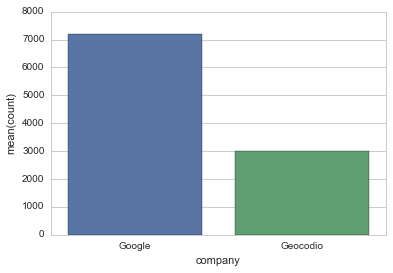

In [6]:
sns.set_style("whitegrid")
terms_data = [('Google',counter_google), ('Geocodio', counter_geocodio)]
terms_labels = ['company', 'count']
# terms_data = [{'name':'company', 'terms': {counter_google, counter_geocodio}
terms_df = pd.DataFrame.from_records(terms_data, columns=terms_labels)
terms_df
ax = sns.barplot(x="company", y="count", data=terms_df)

# plt.bar(terms_df['count'],terms_df['company'], 4)



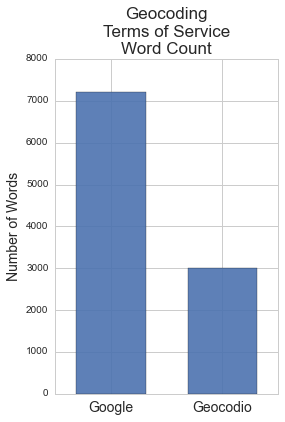

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 4, 6
companies = ('Google', 'Geocodio')
y_pos = [0,.4]
word_counts = [counter_google, counter_geocodio] 
plt.bar(y_pos, 
        word_counts, 
        align='center', 
        alpha=.9, 
        width=.25)
plt.xticks(y_pos, companies, fontsize=14)
plt.ylabel('Number of Words',  fontsize=14)
plt.title('Geocoding\n\
Terms of Service\n\
Word Count',
          fontsize=17)
plt.show()

In [186]:
with open('google_terms.txt') as f:
    terms_text = f.read().replace('\n', '')

print textstat.flesch_reading_ease(terms_text)
print textstat.smog_index(terms_text) # smog
print textstat.flesch_kincaid_grade(terms_text) # grade
print textstat.coleman_liau_index(terms_text) # grade
print textstat.automated_readability_index(terms_text)
print textstat.dale_chall_readability_score(terms_text)
print textstat.difficult_words(terms_text)
print textstat.linsear_write_formula(terms_text)
print textstat.gunning_fog(terms_text)
print textstat.text_standard(terms_text)

39.67
11.2
13.4
13.7
15.3
8.43
808
13.0
11.2
13th and 14th grade


In [187]:
with open('google_maps_terms.txt') as f:
    terms_text = f.read().replace('\n', '')

google_ease_dict = {}
google_ease_dict['flesch_reading_ease'] = textstat.flesch_reading_ease(terms_text)
print textstat.smog_index(terms_text)
print textstat.flesch_kincaid_grade(terms_text)
print textstat.coleman_liau_index(terms_text)
print textstat.automated_readability_index(terms_text)
print textstat.dale_chall_readability_score(terms_text)
print textstat.difficult_words(terms_text)
print textstat.linsear_write_formula(terms_text)
print textstat.gunning_fog(terms_text)
print textstat.text_standard(terms_text)

8.8
12.3
14.39
14.7
7.88
1438
10.5
10.0
14th and 15th grade


In [183]:
with open('geocodio_terms.txt') as f:
    terms_text = f.read().replace('\n', '')

print textstat.flesch_reading_ease(terms_text)
print textstat.smog_index(terms_text) # smog
print textstat.flesch_kincaid_grade(terms_text) # grade
print textstat.coleman_liau_index(terms_text) # grade
print textstat.automated_readability_index(terms_text)
print textstat.dale_chall_readability_score(terms_text)
print textstat.difficult_words(terms_text)
print textstat.linsear_write_formula(terms_text)
print textstat.gunning_fog(terms_text)
print textstat.text_standard(terms_text)

51.18
8.8
11.1
13.0
13.5
7.96
609
6.0
10.0
9th and 10th grade


In [132]:
def get_readability_scores(api, terms_file):
    with open(terms_file) as f:
        terms_text = f.read().replace('\n', '')
        readability_dict = {}
        readability_dict['filesource'] = terms_file
        readability_dict['company'] = api
        readability_dict['smog_index'] = textstat.smog_index(terms_text)                                   # grade
        readability_dict['flesch_kincaid_grade'] = textstat.flesch_kincaid_grade(terms_text)               # grade
        readability_dict['coleman_liau_index'] = textstat.coleman_liau_index(terms_text)                   # grade
        readability_dict['automated_readability_index'] = textstat.automated_readability_index(terms_text) # grade
        readability_dict['dale_chall_readability_score'] = textstat.dale_chall_readability_score(terms_text)
        readability_dict['difficult_words'] = textstat.difficult_words(terms_text)
        readability_dict['linsear_write_formula'] = textstat.linsear_write_formula(terms_text)             # grade 
        readability_dict['gunning_fog'] = textstat.gunning_fog(terms_text)                                 # grade
        return readability_dict
    

In [134]:
google_dict = get_readability_scores('google', 'google_terms.txt')
google_maps_dict = get_readability_scores('google maps', 'google_maps_terms.txt')
geocodio_dict = get_readability_scores('geocodio', 'geocodio_terms.txt')
terms_readability = [google_dict, google_maps_dict, geocodio_dict]
rdbl_columns = ['company','automated_readability_index','coleman_liau_index','dale_chall_readability_score', 'difficult_words','flesch_kincaid_grade','gunning_fog','linsear_write_formula', 'smog_index', 'filesource']
terms_df = pd.DataFrame(terms_readability, columns = rdbl_columns)
grade_score_cols =['automated_readability_index','coleman_liau_index','flesch_kincaid_grade','gunning_fog','linsear_write_formula','smog_index']
terms_grades_df = terms_df[grade_score_cols]
terms_grades_tx_df = terms_grades_df.T
terms_grades_tx_df
terms_df


,company,automated_readability_index,coleman_liau_index,dale_chall_readability_score,difficult_words,flesch_kincaid_grade,gunning_fog,linsear_write_formula,smog_index,filesource
0,google,15.3,13.70,8.43,808,13.4,11.2,13.0,11.2,google_terms.txt
1,google maps,14.7,14.39,7.88,1438,12.3,10.0,10.5,8.8,google_maps_terms.txt
2,geocodio,13.5,13.00,7.96,609,11.1,10.0,6.0,8.8,geocodio_terms.txt


In [179]:
google_grade= terms_grades_tx_df[0].mean().round(1)
google_maps_grade=terms_grades_tx_df[1].mean().round(1)
geocodio_grade = terms_grades_tx_df[2].mean().round(1)
google_hard_words = terms_df.loc[0,'difficult_words']
google_maps_hard_words = terms_df.loc[1, 'difficult_words']
geocodio_hard_words = terms_df.loc[2,'difficult_words']

print ' --TOS--            --Readability Score--       --Difficult Words--'
print 'Google                ', google_grade, '                             ', google_hard_words
print 'Google Maps           ', google_maps_grade,'                            ', google_maps_hard_words
print 'Geocodio              ', geocodio_grade,'                             ',geocodio_hard_words

 --TOS--            --Readability Score--       --Difficult Words--
Google                 13.0                               808
Google Maps            11.8                              1438
Geocodio               10.4                               609


In [75]:
terms_df['grade'] = terms_df 


{'automated_readability_index': 13.5,
 'coleman_liau_index': 13.0,
 'company': 'geocodio',
 'dale_chall_readability_score': 7.96,
 'difficult_words': 609,
 'filesource': 'geocodio_terms.txt',
 'flesch_kincaid_grade': 11.1,
 'gunning_fog': 10.0,
 'linsear_write_formula': 6.0,
 'smog_index': 8.8}

In [70]:
terms_text = 'geocodio_terms.txt'
readability_dict = {}
readability_dict['filesource'] = terms_text
readability_dict['company'] = 'geocodio'
readability_dict['smog_index'] = textstat.smog_index(terms_text)
readability_dict['flesch_kincaid_grade'] = textstat.flesch_kincaid_grade(terms_text)
readability_dict['coleman_liau_index'] = textstat.coleman_liau_index(terms_text)
readability_dict['automated_readability_index'] = textstat.automated_readability_index(terms_text)
readability_dict['dale_chall_readability_score'] = textstat.dale_chall_readability_score(terms_text)
readability_dict['difficult_words'] = textstat.difficult_words(terms_text)
readability_dict['linsear_write_formula'] = textstat.linsear_write_formula(terms_text)
readability_dict['gunning_fog'] = textstat.gunning_fog(terms_text)
readability_dict


{'automated_readability_index': 63.9,
 'coleman_liau_index': 59.0,
 'company': 'geocodio',
 'dale_chall_readability_score': 19.48,
 'difficult_words': 1,
 'filesource': 'geocodio_terms.txt',
 'flesch_kincaid_grade': 27.3,
 'gunning_fog': 42.400000000000006,
 'linsear_write_formula': 0.5,
 'smog_index': 0}